# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Bogotá, Bogota D.C., Colombia**, or **Colombia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Bogotá, Bogota D.C., Colombia** to Ann Arbor, USA. In that case at least one source file must be about **Bogotá, Bogota D.C., Colombia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Bogotá, Bogota D.C., Colombia** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import numpy.ma as ma

df_mm = pd.read_csv('Precipitaciones_Totales_Mensuales.csv')
df_mm = df_mm.rename(columns={'ESTACIÓN':'STATION','MUNICIPIO':'COUNTY', 'CUENCA':'BASIN','AÑO':'YEAR','ENERO':'JANUARY_mm',
                            'FEBRERO':'FEBRUARY_mm', 'MARZO':'MARCH_mm','ABRIL':'APRIL_mm','MAYO':'MAY_mm','JUNIO':'JUNE_mm',
                            'JULIO':'JULY_mm','AGOSTO':'AUGUST_mm', 'SEPTIEMBRE':'SEPTEMBER_mm','OCTUBRE':'OCTOBER_mm',
                            'NOVIEMBRE':'NOVEMBER_mm','DICIEMBRE':'DECEMBER_mm','CÓDIGO':'CODE'})
df_mm = df_mm.drop(['X=N', 'Y=E'], axis=1)

df_days = pd.read_csv('N_mero_de_d_as_con_precipitaci_n.csv')
df_days = df_days.rename(columns={'ESTACIÓN':'STATION','MUNICIPIO':'COUNTY', 'CUENCA':'BASIN','AÑO':'YEAR','ENERO':'JANUARY_days',
                            'FEBRERO':'FEBRUARY_days', 'MARZO':'MARCH_days','ABRIL':'APRIL_days','MAYO':'MAY_days',
                             'JUNIO':'JUNE_days', 'JULIO':'JULY_days','AGOSTO':'AUGUST_days', 'SEPTIEMBRE':'SEPTEMBER_days',
                             'OCTUBRE':'OCTOBER_days', 'NOVIEMBRE':'NOVEMBER_days','DICIEMBRE':'DECEMBER_days','CÓDIGO':'CODE'})
df_days = df_days.drop(['X=N', 'Y=E'], axis=1)

df_disaster = pd.read_csv('Emergencias_Naturales.csv')
df_disaster = df_disaster[df_disaster.columns[:4]]
df_disaster = df_disaster[df_disaster['evento']=='INUNDACION']
df_disaster['date'] = df_disaster['fecha']
df_disaster['fecha'] = pd.to_datetime(df_disaster["fecha"])
    
min_t = ['á','é','í','ó','ú']
min_st = ['a','e','i','o','u']
may_t = ['Á','É','Í','Ó','Ú']
may_st = ['A','E','I','O','U']

for c in ['STATION','COUNTY','BASIN']:
    for i in range(5):
        df_days[c] = df_days[c].str.replace(min_t[i],min_st[i])
        df_days[c] = df_days[c].str.replace(may_t[i],may_st[i])
        df_mm[c] = df_mm[c].str.replace(min_t[i],min_st[i])
        df_mm[c] = df_mm[c].str.replace(may_t[i],may_st[i])

for i in range(5):
    df_disaster['municipio'] = df_disaster['municipio'].str.replace(may_t[i],may_st[i])
    
#df = pd.merge(df_mm, df_days, how='inner', left_on=['CODE','YEAR'],
         #right_on=['CODE','YEAR'])
df = pd.merge(df_mm, df_days, how='inner', left_on=['STATION','CODE','YEAR','COUNTY','BASIN'],
         right_on=['STATION','CODE','YEAR','COUNTY','BASIN'])
df = df.drop_duplicates()
df = df.reset_index()
del df['index']
missing_data = list()
for i in range(len(df)):
    for c in range(12):
        if int(df.iloc[i][df.columns[5+c]]) > 0 and int(df.iloc[i][df.columns[18+c]]) > 0:
            continue
        elif df.iloc[i][df.columns[5+c]] == 0 and df.iloc[i][df.columns[18+c]] == 0:
            continue
        else:
            missing_data.append(i)
            break
df = df.drop(missing_data)
            
Codigos = df['CODE'].unique().tolist()

df_CAR = pd.read_csv('xn--Red_Hidrometeorolgica_CAR-6pc.csv')
df_CAR = df_CAR[df_CAR['CODIGO'].isin(df['CODE'].unique())]

for i in df_CAR['CODIGO'].tolist():
    Codigos.remove(i)

df_IDEAM = pd.read_csv('Cat_logo_Nacional_de_Estaciones_del_IDEAM.csv')
#df_IDEAM = df_IDEAM[df_IDEAM['Departamento'] == 'Cundinamarca']
df_IDEAM = df_IDEAM[df_IDEAM['Codigo'].isin(np.array(Codigos)*10)]
df_IDEAM[['N_LATITUD','N_LONGITUD']] = df_IDEAM['Ubicación'].str.split(',',expand=True)
df_IDEAM['N_LONGITUD'] = np.float64(df_IDEAM['N_LONGITUD'].str[1:-1])
df_IDEAM['N_LATITUD'] = np.float64(df_IDEAM['N_LATITUD'].str[1:-1])

for i in np.array(df_IDEAM['Codigo'])//10:
    Codigos.remove(i)

df_CAR = df_CAR[['CODIGO','N_LATITUD','N_LONGITUD']]

df_IDEAM = df_IDEAM[['Codigo','N_LATITUD','N_LONGITUD']]
df_IDEAM['Codigo'] = df_IDEAM['Codigo']//10
df_IDEAM = df_IDEAM.rename(columns={'Codigo':'CODIGO'})

df_map = pd.concat([df_IDEAM, df_CAR])

lons = df_map['N_LONGITUD'].tolist()
lats = df_map['N_LATITUD'].tolist()

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200, picker=5)
mplleaflet.display()


In [2]:
class precipitations:
    
    df = df.reset_index()
    df_disaster = df_disaster
    del df['index']
    
    def __init__(self):
        self.__flag_filter = False
       
    def filter_by(self, city_main='Santafe de Bogota', basin_main = None):
        assert self.__flag_filter == False, 'Cannot apply this filter'
        self.basin = basin_main
        self.city = city_main
        if city_main != None and basin_main != None:
            self.df_city = self.df[self.df['COUNTY'] == self.city]
            self.df_city = self.df_city[self.df_city['BASIN'] == self.basin]
        elif city_main != None:
            self.df_city = self.df[self.df['COUNTY'] == self.city]
        elif basin_main != None:
            self.df_city = self.df[self.df['BASIN'] == self.basin]
        else:
            print("Didn't apply filter")
            self.df_city = self.df
        self.__flag_time = False
        self.__flag_filter = False
        
    def filter_station(self, station):
        self.station = station
        self.df_city = self.df[self.df['STATION'] == self.station]
        #self.city = self.df_city['COUNTY'].unique()
        self.__flag_time = False
        self.__flag_filter = True
    
    def per_year(self, year):
        self.year = year
        self.df_city = self.df_city[self.df_city['YEAR'] == self.year]
        self.observation_dates = np.arange(str(self.year)+'-01-01', str(self.year+1)+'-01-01', dtype='datetime64[M]')
        self.__flag_time = True
        self.df_disaster = self.df_disaster[(self.df_disaster['fecha'] >= str(self.year)) & (self.df_disaster['fecha'] < str(self.year+1))]
        if self.city == 'Santafe de Bogota':
            self.df_disaster = self.df_disaster[self.df_disaster['municipio'] == 'BOGOTA. D.C.']
        else:
            self.df_disaster = self.df_disaster[self.df_disaster['municipio'] == self.city.upper()]
        self.__plot()
    
    def per_period(self, year_i = None, year_f = None):
        assert self.__flag_time == False, 'Cannot apply this filter of time'
        if year_i == None and year_f == None:
            self.year_i = self.df_city['YEAR'].min()
            self.year_f = self.df_city['YEAR'].max()
        elif year_i != None and year_f != None:
            self.year_i = year_i
            self.year_f = year_f
            if year_i < self.df_city['YEAR'].min():
                self.year_i = self.df_city['YEAR'].min()
            if year_f > self.df_city['YEAR'].max():
                self.year_f = self.df_city['YEAR'].max()
        elif year_i != None:
            self.year_i = year_i
            self.year_f = self.df_city['YEAR'].max()
            if year_i < self.df_city['YEAR'].min():
                self.year_i = self.df_city['YEAR'].min()
        else:
            self.year_f = year_f
            self.year_i = self.df_city['YEAR'].min()
            if year_f > self.df_city['YEAR'].max():
                self.year_f = self.df_city['YEAR'].max()
        self.df_city = self.df_city[self.df_city['YEAR'] >= self.year_i]
        self.df_city = self.df_city[self.df_city['YEAR'] <= self.year_f]
        self.observation_dates = np.arange(str(self.year_i)+'-01-01', str(self.year_f+1)+'-01-01', dtype='datetime64[M]')
        self.df_disaster = self.df_disaster[(self.df_disaster['fecha'] >= str(self.year_i)) & (self.df_disaster['fecha'] < str(self.year_f+1))]
        if self.city == 'Santafe de Bogota':
            self.df_disaster = self.df_disaster[self.df_disaster['municipio'] == 'BOGOTA. D.C.']
        else:
            self.df_disaster = self.df_disaster[self.df_disaster['municipio'] == self.city.upper()]
        self.__plot()
      
    def __plot(self):
        plt.figure(figsize=(14,8))
        years_period = max(self.df_city['YEAR'])-min(self.df_city['YEAR'])+1
        self.df_disaster['month'] = self.df_disaster['fecha'].dt.month + 12 * (self.df_disaster['fecha'].dt.year - min(self.df_city['YEAR']))
        if len(self.df_city['STATION'].unique()) <= 2:
            if len(self.df_city['YEAR'].unique()) > 1:
                for i in self.df_city['STATION'].unique():
                    if len(self.df_city[self.df_city['STATION'] == i]) == years_period:
                        data_mm = np.array([])
                        df_copy = self.df_city[self.df_city['STATION'] == i]
                        for y in range(min(self.df_city['YEAR']),max(self.df_city['YEAR'])+1):
                            data_mm = np.hstack([data_mm,df_copy[df_copy['YEAR']==y].values[0][5:17]])
                        plt.plot(self.observation_dates, data_mm, label = i)
                ax1 = plt.gca()
                ax2 = ax1.twinx()
                ax2.set_ylabel('Number of days (--)')
                for i in self.df_city['STATION'].unique():
                    if len(self.df_city[self.df_city['STATION'] == i]) == years_period:
                        data_days = np.array([])
                        df_copy = self.df_city[self.df_city['STATION'] == i]
                        for y in range(min(self.df_city['YEAR']),max(self.df_city['YEAR'])+1):
                            data_days = np.hstack([data_days,df_copy[df_copy['YEAR']==y].values[0][18:]])
                        ax2.plot(self.observation_dates, data_days, ls = '--')
                for j in pd.to_datetime(pd.to_datetime(self.df_disaster['date']).astype(str).str[:7]):
                    plt.axvline(j, color = 'black', ls = ':', c= 'grey')
                plt.show()
            else:
                for i in range(len(self.df_city)):
                    plt.plot(self.observation_dates,self.df_city.iloc[i].values[5:17], label = self.df_city.iloc[i][0])
                plt.legend(title='Stations:')
                plt.title(" Precipitations in " + self.city + ' per month', fontsize = 16)
                plt.ylabel("Volume (mm)", fontsize = 11)
                plt.xlabel("Dates", fontsize = 11)
                ax1 = plt.gca()
                ax2 = ax1.twinx()
                ax2.set_ylabel('Number of days (--)')
                for i in range(len(self.df_city)):
                    ax2.plot(self.observation_dates, self.df_city.iloc[i].values[18:], label = 'dias', ls = '--')
                for j in pd.to_datetime(pd.to_datetime(self.df_disaster['date']).astype(str).str[:7]):
                    plt.axvline(j, color = 'black', ls = ':', c= 'grey')
        else:
            mm_max = 0
            for i in self.df_city.index:
                if max(self.df_city.loc[i][5:17].values) > mm_max:
                    mm_max = max(self.df_city.loc[i][5:17].values)
            X = np.linspace(0,mm_max,12*years_period)     
            if len(self.df_city['YEAR'].unique()) > 1:
                name_stations = list()
                for i in self.df_city['STATION'].unique():
                    if len(self.df_city[self.df_city['STATION'] == i]) == years_period:
                        name_stations.append(i)
                p = len(name_stations)
                m = X*p/(max(X*p)/p) 
                Yy = p-(np.arange(p)+0.5)
                Xx = [p,]*p
                rects = plt.barh(Yy, Xx, align='center', height=0.8, color='.95', ec='None', zorder=-20)
                plt.xlim(0,p), plt.ylim(0,p)
                for i in range(p):
                    label = name_stations[p-1-i]
                    plt.text(-.1, Yy[i], label, ha = "right", fontsize=10)
                    plt.axvline(0,   (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
                    plt.axvline(m[int(len(m)*0.25-1)], (Yy[i]-.375)/p, (Yy[i]+.4)/p, c='.3', lw=.5, zorder=-15, ls = '--')
                    plt.axvline(m[int(len(m)*0.5-1)], (Yy[i]-.375)/p, (Yy[i]+.4)/p, c='.3', lw=.5, zorder=-15, ls = '--')
                    plt.axvline(m[int(len(m)*0.75-1)], (Yy[i]-.375)/p, (Yy[i]+.4)/p, c='.3', lw=.5, zorder=-15, ls = '--')
                    data_mm = np.array([])
                    df_copy = self.df_city[self.df_city['STATION'] == name_stations[i]]
                    for y in range(min(self.df_city['YEAR']),max(self.df_city['YEAR'])+1):
                        data_mm = np.hstack([data_mm,df_copy[df_copy['YEAR']==y].values[0][5:17]])
                    plt.plot(X*p/(max(X*p)/p), i+0.1+0.8*(data_mm/mm_max), c='k', lw=2)
                    for d in self.df_disaster['month']:  
                        plt.axvline(m[d-1], (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='red', lw=.7, zorder=-15)
                    for j in range(p):
                        if i != j:
                            df_copy = self.df_city[self.df_city['STATION'] == name_stations[j]]
                            data_mm = np.array([])
                            for y in range(min(self.df_city['YEAR']),max(self.df_city['YEAR'])+1):
                                data_mm = np.hstack([data_mm,df_copy[df_copy['YEAR']==y].values[0][5:17]])
                            plt.plot(X*p/(max(X*p)/p), i+0.1+0.8*data_mm/mm_max, c='.3', lw=.5, zorder=-10)
                plt.text(0, 0, self.observation_dates[0], va = "top", ha="center", fontsize=10)
                plt.text(m[int(len(m)*0.25-1)], 0, self.observation_dates[int(len(m)*0.25-1)], va = "top", ha="center", fontsize=10)
                plt.text(m[int(len(m)*0.5-1)], 0, self.observation_dates[int(len(m)*0.5-1)], va = "top", ha="center", fontsize=10)
                plt.text(m[int(len(m)*0.75-1)], 0, self.observation_dates[int(len(m)*0.75-1)], va = "top", ha="center", fontsize=10)
                plt.text(1*p, 0, self.observation_dates[-1], va = "top", ha="center", fontsize=10)
                plt.axis('off')
                plt.title("Precipitations at period " + str(min(self.df_city['YEAR'])) + "-" + str(max(self.df_city['YEAR']))+" in " + self.city + "\n Range 0-" + str(mm_max) + " mm", fontsize = 16)
            else:
                p = len(self.df_city)
                m = X*p/(max(X*p)/p) 
                Yy = p-(np.arange(p)+0.5)
                Xx = [p,]*p
                rects = plt.barh(Yy, Xx, align='center', height=0.8, color='.95', ec='None', zorder=-20)
                plt.xlim(0,p), plt.ylim(0,p)
                for i in range(p):
                    label = self.df_city.iloc[p-1-i][0]
                    plt.text(-.1, Yy[i], label, ha = "right", fontsize=10)
                    plt.axvline(0,   (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
                    plt.axvline(m[2], (Yy[i]-.375)/p, (Yy[i]+.4)/p, c='.3', lw=.5, zorder=-15, ls = '--')
                    plt.axvline(m[5], (Yy[i]-.375)/p, (Yy[i]+.4)/p, c='.3', lw=.5, zorder=-15, ls = '--')
                    plt.axvline(m[8], (Yy[i]-.375)/p, (Yy[i]+.4)/p, c='.3', lw=.5, zorder=-15, ls = '--')
                    plt.plot(X*p/(max(X*p)/p), i+0.1+0.8*(self.df_city.iloc[i].values[5:17]/mm_max), c='k', lw=2)
                    for d in self.df_disaster['month']:  
                        plt.axvline(m[d-1], (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='red', lw=.7, zorder=-15)
                    for j in range(p):
                        if i != j:
                            plt.plot(X*p/(max(X*p)/p), i+0.1+0.8*self.df_city.iloc[j].values[5:17]/mm_max, c='.3', lw=.5, zorder=-10)
                plt.text(0, 0, "Jan", va = "top", ha="center", fontsize=10)
                plt.text(m[2], 0, "March", va = "top", ha="center", fontsize=10)
                plt.text(m[5], 0, "June", va = "top", ha="center", fontsize=10)
                plt.text(m[8], 0, "Sept", va = "top", ha="center", fontsize=10)
                plt.text(1*p, 0, "Dec", va = "top", ha="center", fontsize=10)
                plt.axis('off')
                plt.title("Precipitations at year " + str(self.year) + " in " + self.city + "\n Range 0-" + str(mm_max) + " mm", fontsize = 16)
        plt.show()
        

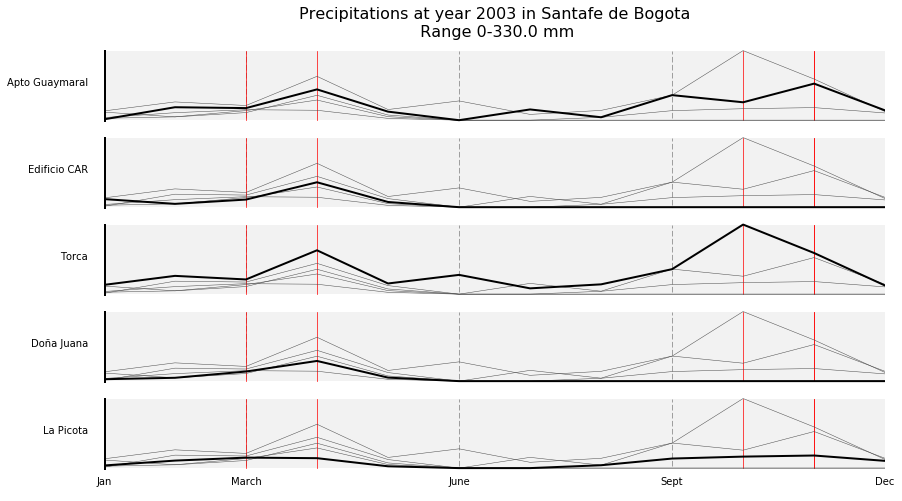

STATION     CODE             COUNTY        BASIN  YEAR  \
2358       La Picota  2120156  Santafe de Bogota  R. Tunjuelo  2003   
2729      Doña Juana  2120630  Santafe de Bogota  R. Tunjuelo  2003   
3030           Torca  2120077  Santafe de Bogota    R. Bogota  2003   
3093    Edificio CAR  2120058  Santafe de Bogota       Bogota  2003   
3180  Apto Guaymaral  2120559  Santafe de Bogota    R. Bogota  2003   

      JANUARY_mm  FEBRUARY_mm  MARCH_mm  APRIL_mm  MAY_mm      ...        \
2358        12.4         35.6      49.7      47.1     8.6      ...         
2729         9.1         15.8      45.5      95.7    16.7      ...         
3030        43.9         86.7      69.7     208.0    50.6      ...         
3093        38.4         15.7      36.1     118.1    24.6      ...         
3180         4.1         61.5      57.4     146.1    40.6      ...         

      MARCH_days  APRIL_days  MAY_days  JUNE_days  JULY_days  AUGUST_days  \
2358           8          18         6          0          0            8   
2729          11          16        17          0          0            0   
3030           7          19         7         14          7            7   
3093          10          15        13          0          0            0   
3180          13          14        10          0         13            7   

      SEPTEMBER_days OCTOBER_days  NOVEMBER_days  DECEMBER_days  
2358              11           20             22           12.0  
2729               0            0              0            0.0  
3030               9           21             18           12.0  
3093               0            0              0            0.0  
3180               9           15             15            5.0  

[5 rows x 30 columns]

In [3]:
data3 = precipitations()
data3.filter_by()
data3.per_year(2003)
data3.df_city

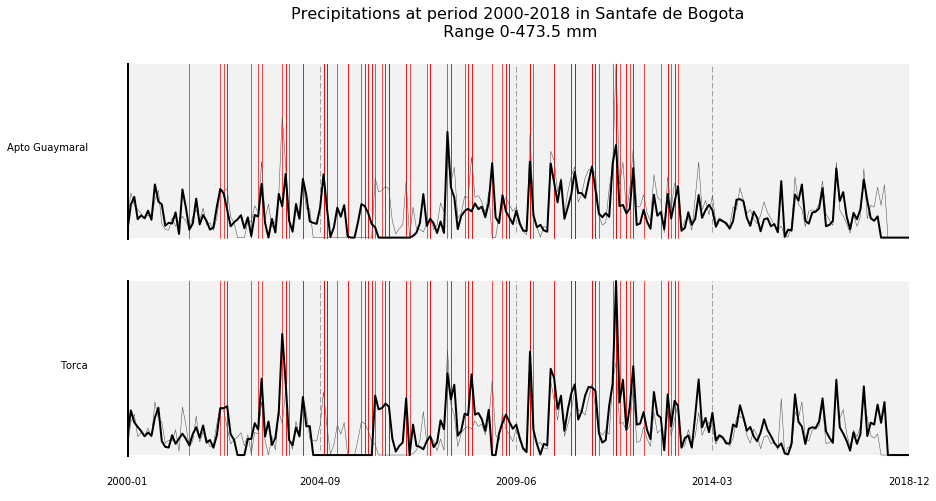

In [4]:
data5 = precipitations()
data5.filter_by()
data5.per_period(2000)
#data5.df_city

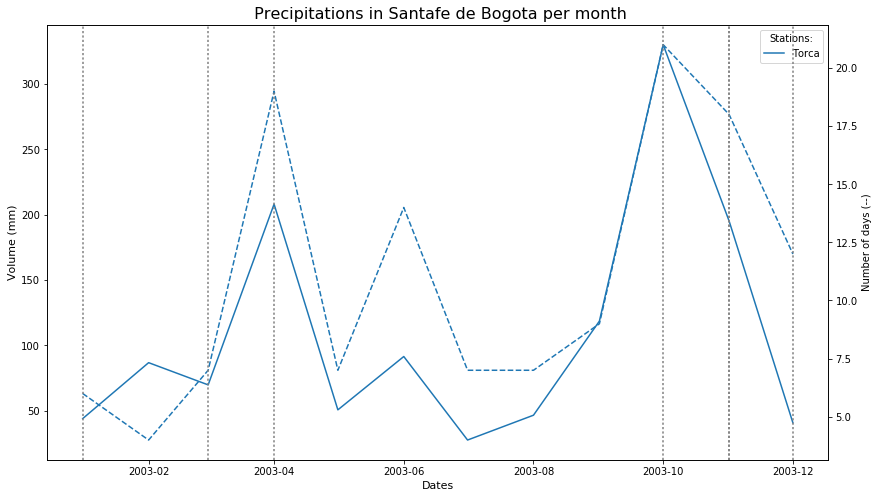

In [5]:
data4 = precipitations()
data4.filter_by()
data4.filter_station('Torca')
data4.per_year(2003)

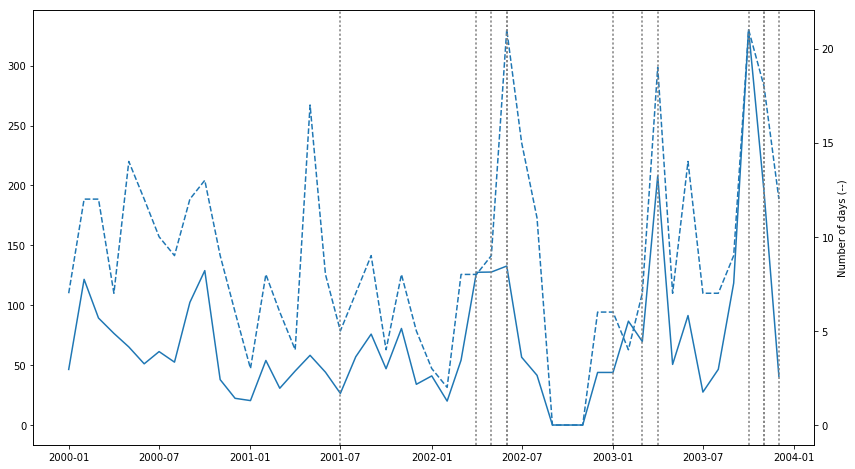

In [6]:
data = precipitations()
data.filter_by()
data.filter_station('Torca')
data.per_period(2000,2003)

In [7]:
gps = data5.df_city['CODE'].values
data5.df_city = data5.df_city.drop(['STATION','CODE','BASIN','CORRIENTE'], axis = 1)
type(data5.df_city.groupby(['COUNTY','YEAR'])[data5.df_city.columns[2:]].agg(np.average))

pandas.core.frame.DataFrame

In [8]:
data5.df_city.groupby(['COUNTY','YEAR'])[data5.df_city.columns[2:]].agg(np.average)

JANUARY_mm  FEBRUARY_mm    MARCH_mm    APRIL_mm  \
COUNTY            YEAR                                                    
Santafe de Bogota 2000   41.700000       84.000   79.480000   44.740000   
                  2001   13.720000       33.740   34.360000   21.240000   
                  2002   22.260000       22.180   44.460000  102.500000   
                  2003   21.580000       43.060   51.680000  123.000000   
                  2004   11.900000       41.650   34.100000  109.000000   
                  2005   13.975000       30.875   27.750000   54.450000   
                  2006   89.825000       34.700   84.325000   97.650000   
                  2007    9.575000       20.950   55.350000   66.375000   
                  2008   17.480000       41.880   53.900000   65.020000   
                  2009   39.280000       59.580   60.240000   61.120000   
                  2010   10.700000       23.025   15.800000  171.750000   
                  2011   80.360000      118.100  136.240000  199.860000   
                  2012   89.300000       56.660  117.780000  177.720000   
                  2013   12.725000      114.725   67.825000  125.575000   
                  2014   57.975000       57.275   78.350000   41.225000   
                  2015   38.600000       48.050   72.375000   49.600000   
                  2016    7.350000       26.275  107.075000   84.350000   
                  2017   33.366667       43.100  179.966667   74.466667   
                  2018   47.525000       52.250   72.800000   61.475000   

                            MAY_mm     JUNE_mm     JULY_mm  AUGUST_mm  \
COUNTY            YEAR                                                  
Santafe de Bogota 2000   55.980000   37.680000   46.380000     41.860   
                  2001   51.400000   36.360000   26.500000     32.400   
                  2002  118.340000  100.380000   35.820000     41.560   
                  2003   28.220000   18.280000   15.700000     14.820   
                  2004   70.275000   51.675000   19.475000     19.000   
                  2005   55.975000   22.000000   16.250000     19.925   
                  2006   69.225000   42.700000   23.750000     15.775   
                  2007   45.325000   51.800000   30.775000     63.575   
                  2008  121.080000   74.760000   65.920000     67.860   
                  2009   27.760000   40.000000   26.680000     16.700   
                  2010  171.050000   88.175000  141.375000     46.700   
                  2011  151.960000   53.720000   62.960000     40.420   
                  2012   43.620000   50.880000   81.560000     57.920   
                  2013  127.275000   26.550000   48.500000     50.750   
                  2014   58.025000   54.075000   46.850000     25.050   
                  2015   36.575000   83.550000   54.425000     36.650   
                  2016   93.300000   34.700000   48.325000     66.875   
                  2017   96.533333   72.433333   29.433333     67.900   
                  2018   36.000000    0.000000    0.000000      0.000   

                        SEPTEMBER_mm  OCTOBER_mm      ...        MARCH_days  \
COUNTY            YEAR                                ...                     
Santafe de Bogota 2000     72.340000      59.460      ...             10.20   
                  2001     57.340000      33.680      ...              6.80   
                  2002     29.720000      56.540      ...              9.40   
                  2003     56.540000      93.900      ...              9.80   
                  2004     29.500000     109.650      ...              7.25   
                  2005     55.650000      65.200      ...              7.75   
                  2006     15.825000     106.450      ...             15.25   
                  2007     29.100000     197.825      ...              8.75   
                  2008     40.080000      80.920      ...             10.40   
                  2009     15.580000     134.

In [9]:
np.__version__

'1.12.1'

In [10]:
pd.__version__

'0.19.2'

In [11]:
import matplotlib
matplotlib.__version__

'2.0.0'